In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["trust_analysis_db"]
collection = db["merged_trust_population"]

In [2]:
# fetching data from db and converting to df
cursor = collection.find()
data = pd.DataFrame(list(cursor))
data.drop(columns=['_id'], inplace=True)
print(data.head())

     country  doctor_and_nurses  government  journalist  neighbourhood  \
0      China              90.86       56.93       74.62          88.08   
1      India              85.67       74.18       69.12          68.36   
2  Indonesia              81.09       70.82       63.41          80.38   
3    Nigeria              64.21       21.11       37.00          42.47   
4     Brazil              84.87       42.98       56.36          53.58   

   philantropist    population  scientist  traditional_healers  
0          73.24  1.426106e+09      96.57                92.47  
1          65.68  1.402618e+09      85.30                38.20  
2          58.64  2.748149e+08      70.11                66.59  
3          44.08  2.139962e+08      47.41                35.11  
4          65.22  2.086608e+08      79.73                26.95  


In [3]:
#making sure columns are float and rounded to 2 decimals
trust_columns = [
    'neighbourhood', 
    'government', 
    'scientist', 
    'journalist', 
    'doctor_and_nurses', 
    'philantropist', 
    'traditional_healers'
]
top_50_countries = data.nlargest(50, "population")

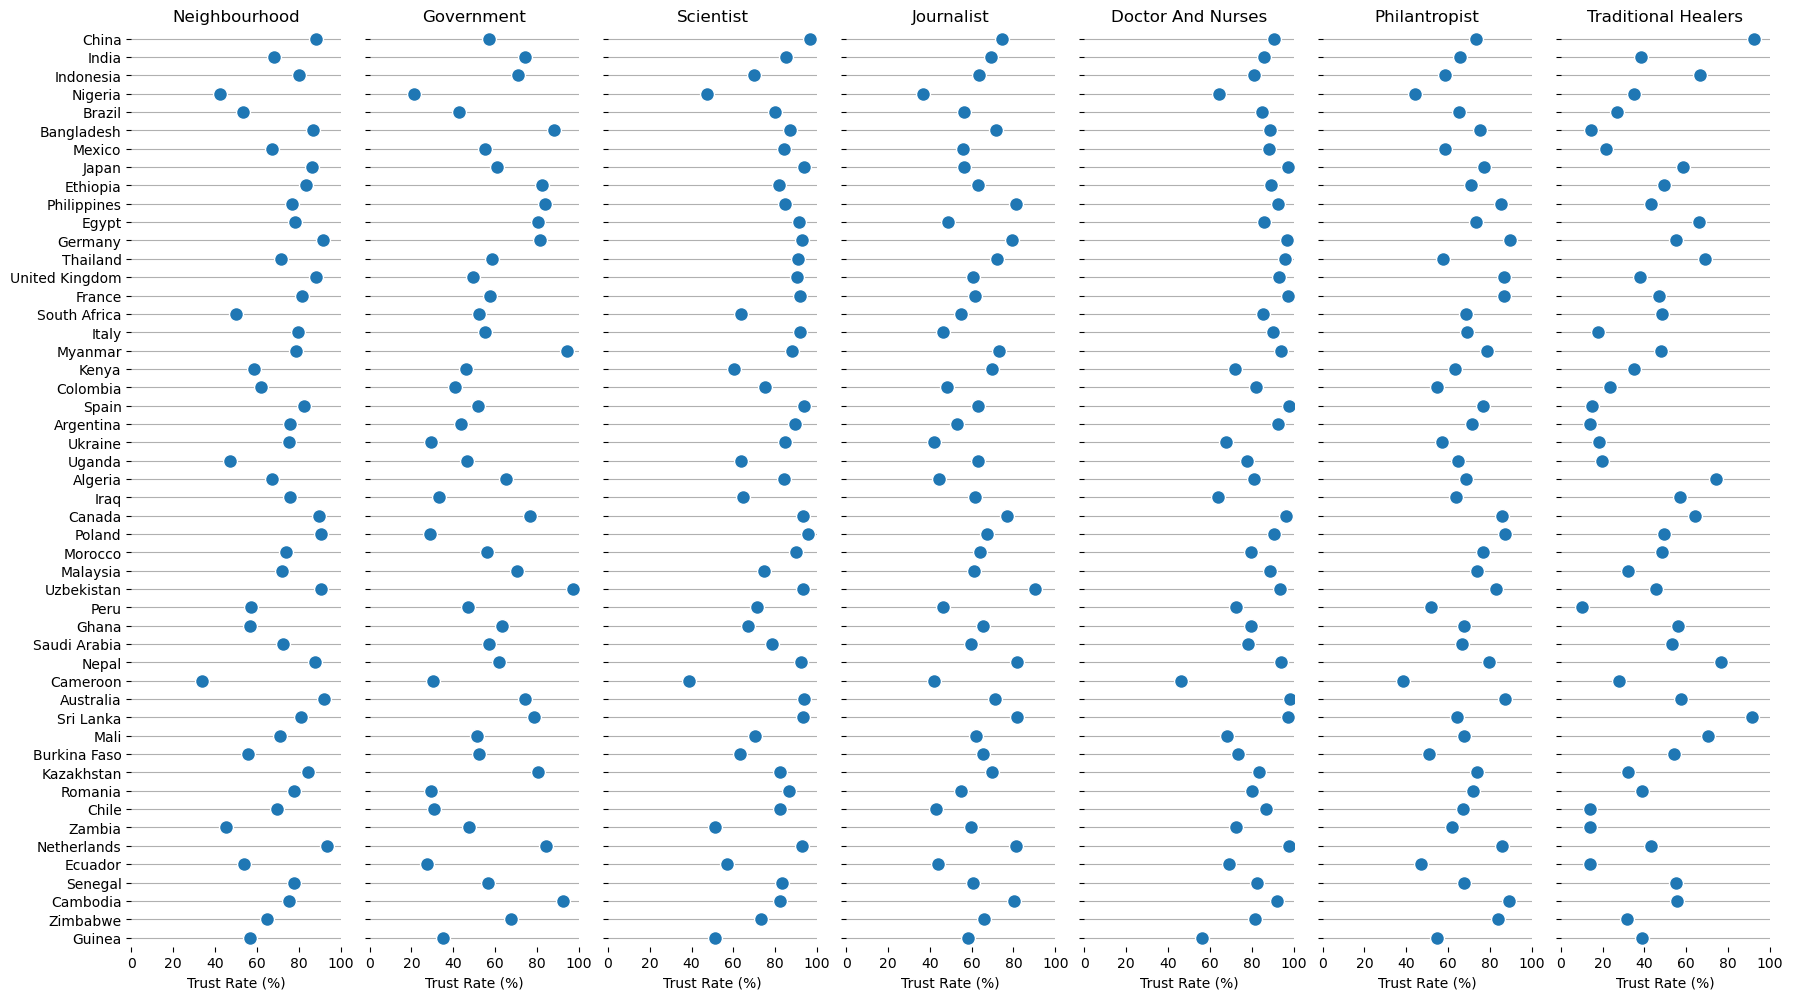

In [5]:
# Create PairGrid

g = sns.PairGrid(top_50_countries,
                 x_vars=trust_columns, y_vars=["country"],
                 height=10, aspect=.25)

# Draw a dot plot
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Set x-axis limits and labels
g.set(xlim=(0, 100), xlabel="Trust Rate (%)", ylabel="")

# Add titles dynamically
titles = [col.replace('_', ' ').title() for col in trust_columns]
for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

# Clean up the plot
sns.despine(left=True, bottom=True)
plt.show()

In [6]:
# finding bottom 50 countries plot

bottom_50_countries = data.nsmallest(50, "population")

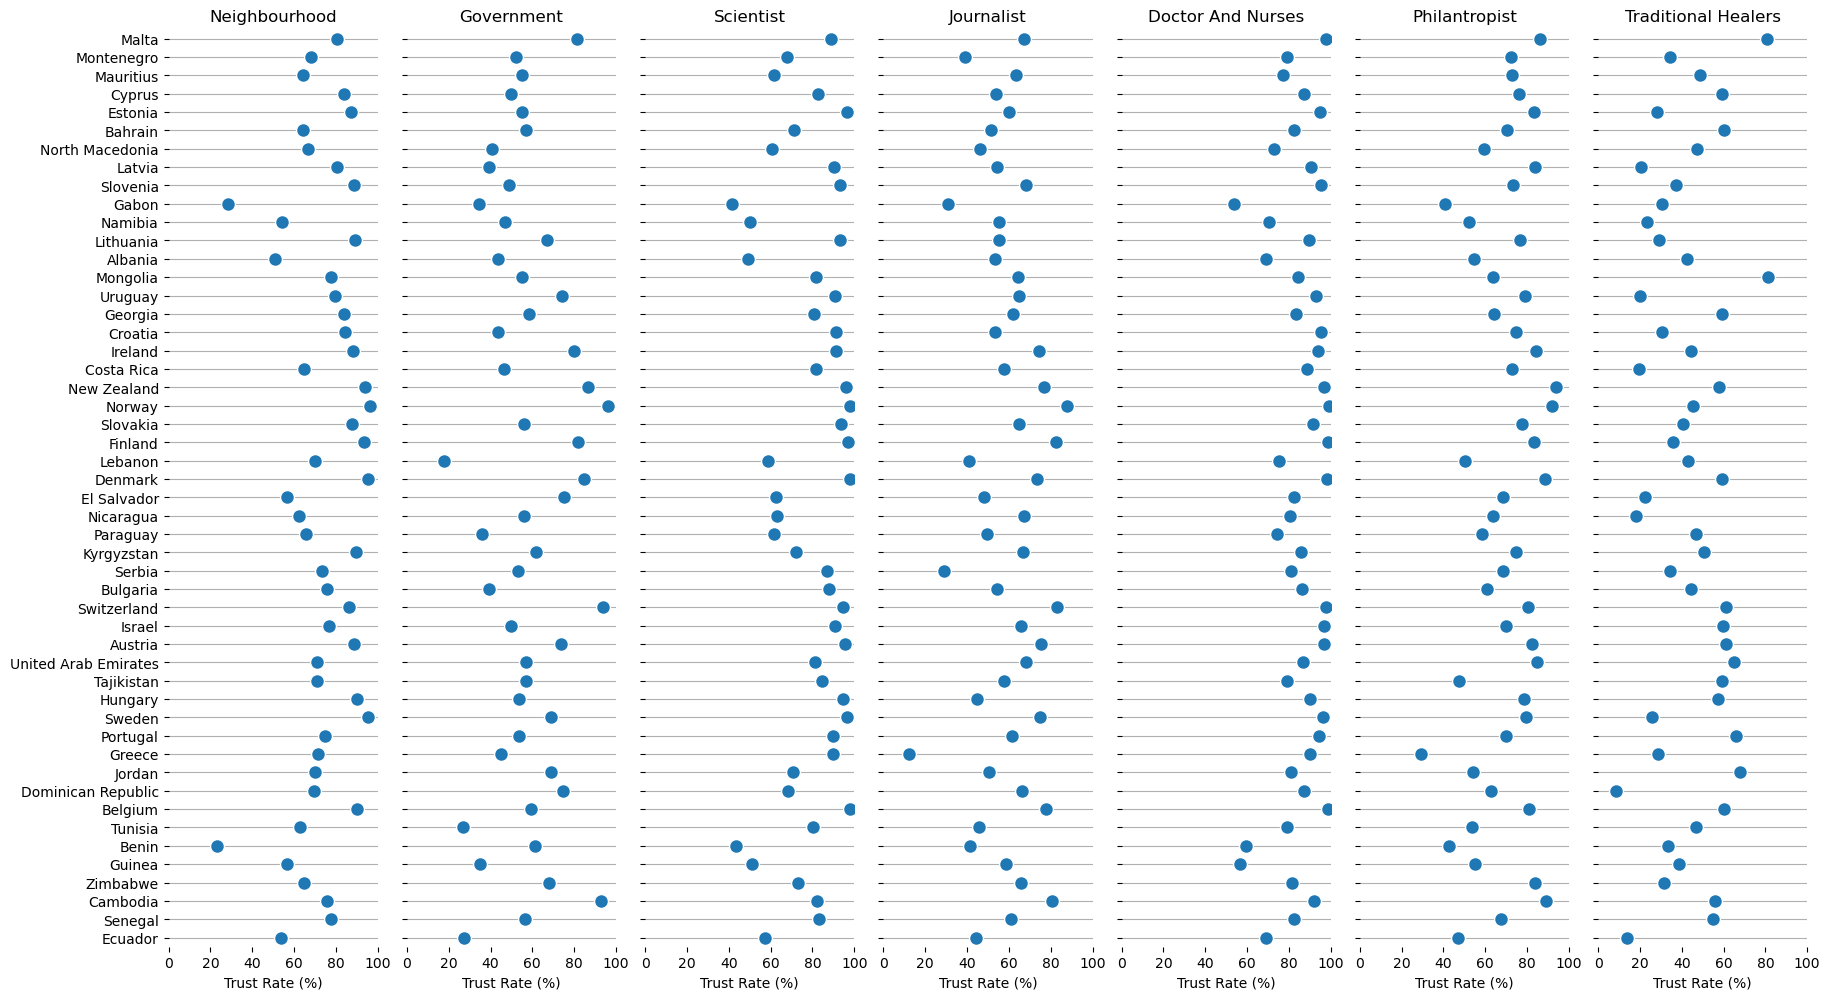

In [7]:

g = sns.PairGrid(bottom_50_countries,
                 x_vars=trust_columns, y_vars=["country"],
                 height=10, aspect=.25)


g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

g.set(xlim=(0, 100), xlabel="Trust Rate (%)", ylabel="")


titles = [col.replace('_', ' ').title() for col in trust_columns]
for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)


sns.despine(left=True, bottom=True)
plt.show()